In [1]:
%matplotlib inline
from utils import *
from plotting import *
from models import *

In [2]:
dataset, pose = load_dataset('dataset_animalai3', file_format='.npy', load_pose=True, pose_filename='pose.npy')

In [3]:
position = pose[:,:2]

In [4]:
dataset = np.reshape(dataset, (20000, int(84*84*3)))

In [5]:
from sklearn.preprocessing import StandardScaler

dataset = StandardScaler().fit_transform(dataset)

In [6]:
from sklearn.decomposition import PCA

pca = PCA(n_components=200)
embeddings = pca.fit_transform(dataset)

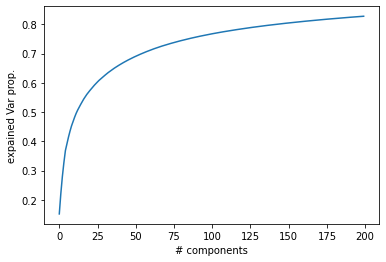

In [7]:
cum_var = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(pca.n_components_), cum_var)
plt.xlabel('# components')
plt.ylabel('expained Var prop.')
plt.show()

In [9]:
embeddings = np.abs(embeddings)

In [10]:
all_ratemaps = ratemaps(embeddings, position, n_bins=50, filter_width=3, n_bins_padding=0)

In [11]:
plot_ratemaps(all_ratemaps)